# FIT9136 - Week 8 Applied Session

## Table of Contents:

1. [* Exercise 1: Introduction to RE](#exercise-1)
2. [* Exercise 2: TXT to CSV](#exercise-2)
3. [* Exercise 3: Body-Mass Index (BMI) Calculation?](#exercise-3)

### * Exercise 1:  Introduction to RE<a class="anchor" id="exercise-1"></a>
#re #regular-expression #regex

<div class="alert alert-block alert-success">

<blockquote>
This module provides regular expression matching operations ... -<a href='https://docs.python.org/3/library/re.html'>Python 3 Docs</a>
</blockquote>

So, now we know we need to import **`re`** library in order to use regular expressions. 

</div>

In [1]:
# importing the regular expresion library
import re

<div class="alert alert-block alert-success">

### Commonly used methods
    
</div>

<div class="alert alert-block alert-success">

#### **A.** `re.search(pattern, string, flags=0)`

<blockquote>
Scan through string looking for the <b>first</b> location where the regular expression pattern produces a match, and return a corresponding match object. -Python 3 Doc
</blockquote>

</div>

In [2]:
# searching 'abc' from '1234abc5678derg abc'
search_string = '1234abc5678derg abc'
pattern = 'abc'

result = re.search(pattern, search_string)

print("result:", result)
print("result.span():", result.span())
# the index location of 'abc' is from 4(inclusive) to 7(exclusive)
print("search_string[result.span()[0]: result.span()[1]] => search_string[4:7]:", 
      search_string[result.span()[0]: result.span()[1]]) 

result: <re.Match object; span=(4, 7), match='abc'>
result.span(): (4, 7)
search_string[result.span()[0]: result.span()[1]] => search_string[4:7]: abc


In [3]:
# searching '2bc' from '1234abc5678derg'
search_string = '1234abc5678derg'
pattern = '2bc'

# if pattern not found, None is returned from re.search
result = re.search(pattern, search_string)
print("result:", result) 

result: None


<div class="alert alert-block alert-success">


#### **B.** `re.findall(pattern, string, flags=0)`
<blockquote>
Return all <b>non-overlapping matches</b> of pattern in string, as a list of strings or tuples. -Python 3 Doc
</blockquote>
    
</div>

In [4]:
search_string = '1234abc5678 dergabc 30374 abcr3g'
pattern = 'abc'

result = re.findall(pattern, search_string)
print(result) # all 'abc's found in search_string as a list

['abc', 'abc', 'abc']


<div class="alert alert-block alert-success">

#### **C.** `re.sub(pattern, repl, string, count=0, flags=0)`

<blockquote>
Return the string obtained by replacing the <b>leftmost non-overlapping occurrences</b> of pattern in string by the replacement repl. If the pattern isn’t found, string is returned unchanged. -Python 3 Doc
</blockquote>

</div>

In [5]:
search_string = '1234abc5678 dergabc 30374 abcr3g'

pattern = 'abc'
# pattern = r'\d+'
repl = '   '

result = re.sub(pattern, repl, search_string)
print(result) # the replaced string

1234   5678 derg    30374    r3g


<div class="alert alert-block alert-success">

### Regular Expressions

Now we know some of the methods implemented in the re library. However, what actually are regular expressions?

<blockquote>
A regular expression (shortened as regex or regexp...) is a sequence of characters that specifies a search pattern. - Wikipedia
</blockquote>

Some useful tools to test/visualise the regex:
1. [regex101](https://regex101.com/): a webapp to test your regex
2. [Regexper](https://regexper.com/): regex visualisation tool

</div>

<div class="alert alert-block alert-success">
    
#### <b>Basic Syntax: A query string</b>

- e.g.: `r"abc"` if we want to search "abc" (Simply the string you want to search after you press *ctrl+F* or *Command+F*)
    
<font color='red'><b>Question:</b></font> What does the `r` before the quote specify?
    
</div>

In [0]:
# print('\n') won't print out anything
# therefore use r"" (the raw string) which will keep all the special character
# print(r'\n')

In [6]:
str1 = "abc\n"
print(str1)

abc



In [7]:
str2 = r"abc\n"
print(str2)

abc\n


<div class="alert alert-block alert-success">

<font color='red'><b>Answer:</b></font> ??

</div>

<div class="alert alert-block alert-success">

#### <b>(Some) Special characters in regex</b>

- `.` (Dot): Wildcard. Can be any character except newline characters.
- `?`(Question Mark): Can match Zero or one occurrences of the character.
- `*` (Star): Causes the resulting RE to match 0 or more repetitions of the preceding RE, as many repetitions as are possible. The '\*' qualifier is *greedy*; it matches as much text as possible. 
    - Adding `?` after the `*` makes it *lazy*; as few characters as possible will be matched.
    - e.g. `r"ab*"` will match ‘a’, ‘ab’, or ‘a’ followed by any number of ‘b’s.

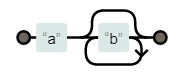

</div>    

In [0]:
? {0,1}
+ {1,}
* {0,}


In [8]:
# Dot
search_string = '11 1. Rand0M $trinG'

pattern = r'1.'

result = re.search(pattern, search_string)
print(result)

# Question: What if we want to search '1.' from "11 1. Rand0M $trinG" literally?
# Answer: put a \ before . to escape wildcard, same applies to escape all other special characters in regex
pattern = r'1\.'

result = re.search(pattern, search_string)
print(result)

<re.Match object; span=(0, 2), match='11'>
<re.Match object; span=(3, 5), match='1.'>


In [9]:
# Question Mark (?)
txt = "AB1234 ABN ABC ABDC"
# txt = "ABNNNNN" -> [ABN] 

#Search for a sequence that starts with "AB", followed by 0 or 1  (N) character:

x = re.findall("ABN?", txt)

print(x)

['AB', 'ABN', 'AB', 'AB']


In [10]:
# Star (*)
search_string = '11 1. Rand0M $trinG'

# searching for strings with 0 or more characters 
# using combination of .*
pattern = r'.*' 

result = re.findall(pattern, search_string)
print(result)

['11 1. Rand0M $trinG', '']


In [11]:
# Let's see the greedy and Lazy expression work
search_string = '11 1. Rand0M $trinG Rand0M $trinG'
pattern1 = r'R.*M' # greedy
result1 = re.search(pattern1, search_string)

pattern2 = r'R.*?M' # lazy
result2 = re.search(pattern2, search_string)

print(result1, result2)
# print(result1.group())
# print(result2.group())

<re.Match object; span=(6, 26), match='Rand0M $trinG Rand0M'> <re.Match object; span=(6, 12), match='Rand0M'>


<div class="alert alert-block alert-info">
    
#### Additional Characters for regex pattern:

| Character | description |
| --- | --- |
| `\d` | Matches any decimal digit; this is equivalent to `[0-9]` |
| `\s` | Matches characters considered whitespace in the ASCII character set; this is equivalent to `[ \t\n\r\f\v]` |
| `\w` | Matches characters considered alphanumeric in the ASCII character set; this is equivalent to `[a-zA-Z0-9_]` |
| `\D` | Matches any character which is not a decimal digit. This is the opposite of `\d`. This is equivalent to `[^0-9]` |
| `\S` | Matches any character which is not a whitespace character. This is the opposite of `\s`. This is equivalent to `[^ \t\n\r\f\v]` |
| `\W` | Matches any character which is not a word character. This is the opposite of `\w`. This is equivalent to `[^a-zA-Z0-9_]` |
    
</div>

### * Exercise 2:  TXT to CSV<a class="anchor" id="exercise-2"></a>

#File-operation #regex #file-read #file-write

In [0]:
# important for Assignment2 - teaching units

<div class="alert alert-block alert-success">

In this exercise, we will read the data from the TXT file, extract the required information and the store in the CSV file.
   
<br>
    
The TXT file (*data.txt*) contains information about the books `id`, `author`, `title`, `genre`, `price`, `date`, and `description`. We want to extract the `id`, `title`, and `price` from it, and store the data into Comma-Separated Values formatted (CSV) file.

<br>    
To do this we need to perform the following steps:

- Read the data by opening the file    
- Extract the required data from the data using regex
- Formating the data into CSV
- Writing the data into CSV
    
**Write a Python Program to perform the extract from the file and store it into CSV file.**
    
    
<br>    
    
* Data file can be downloaded from here. [data.txt](https://drive.google.com/file/d/1PubQnzJR9lDm0RI38dLDmWAX167NnusQ/view?usp=sharing)
    
    
</div> 

In [12]:
# Import re
import re

In [13]:
# Read the data using open function from file 'data.txt'

In [14]:
# Removing the '\n' & '\t' character

'{"data": [{"id": 15246,"title": "Book data","description": "Contains infromation about the book\'s data"}],"data_0": [{"id": "bk101","author": "Gambardella, Matthew","title": "XML Developer\'s Guide","genre": "Computer","price": "44.95","publish_date": "2000-10-01","description": "An in-depth look at creating applications with XML."},{"id": "bk102","author": "Ralls, Kim","title": "Midnight Rain","genre": "Fantasy","price": "5.95","publish_date": "2000-12-16","description": "A former architect battles corporate zombies, an evil sorceress, and her own childhood to become queen of the world."},{"id": "bk103","author": "Corets, Eva","title": "Maeve Ascendant","genre": "Fantasy","price": "5.95","publish_date": "2000-11-17","description": "After the collapse of a nanotechnology society in England, the young survivors lay the foundation for a new society."},{"id": "bk104","author": "Corets, Eva","title": "Oberon\'s Legacy","genre": "Fantasy","price": "5.95","publish_date": "2001-03-10","desc

In [15]:
# creating the regex to get the data

<div class="alert alert-block alert-info">
    
#### Function: `eval()`
The `eval()` function evaluates the specified expression, if the expression is a legal Python statement, it will be executed.  
Syntax:  
eval(expression, globals, locals)

    
| | |
|--- | ---|
|<strong>expression</strong> | A String, that will be evaluated as Python code |
|<strong>globals</strong> | *Optional.* A dictionary containing global parameters |
|<strong>locals</strong> | *Optional.* A dictionary containing local parameters |

    
##### `eval()` is considered insecure because it allows you (or your users) to dynamically execute arbitrary Python code.

This is considered bad programming practice because the code that you’re reading (or writing) is not the code that you’ll execute. If you’re planning to use `eval()` to evaluate input from a user or any other external source, then you won’t know for sure what code is going to be executed. That’s a serious security risk if your application runs in the wrong hands.  
For this reason, good programming practices generally recommend against using `eval()`. But if you choose to use the function anyway, then the rule of thumb is to never ever use it with untrusted input    
    
</div>    

In [16]:
# using loops and eval function to get into dict format
# and then finding the id, title, and price

bk101 XML Developer's Guide 44.95
bk102 Midnight Rain 5.95
bk103 Maeve Ascendant 5.95
bk104 Oberon's Legacy 5.95
bk201 The Happiest Man On Earth 26.95
bk202 Courage to be Disliked 19.99
bk203 The Eye of the World 59.99


In [17]:
# format the data for the CSV file, 
# think of pattern for CSV like "item 1","item 2"

id,title,price
"bk101","XML Developer's Guide","44.95"
"bk102","Midnight Rain","5.95"
"bk103","Maeve Ascendant","5.95"
"bk104","Oberon's Legacy","5.95"
"bk201","The Happiest Man On Earth","26.95"
"bk202","Courage to be Disliked","19.99"
"bk203","The Eye of the World","59.99"



In [18]:
# Write the data to file name 'clean.csv'

### * Exercise 3:  Body-Mass Index (BMI) Calculation<a class="anchor" id="exercise-3"></a>

#Exception-Handling #try-except-finally #assert #raise

<div class="alert alert-block alert-success">

### What is BMI?
Body mass index, or BMI, is used to determine whether you are in a healthy weight range for your height.

It is useful to consider BMI alongside waist circumference, as waist measurement helps to assess risk by measuring the amount of fat carried around your middle.

BMI is a useful measurement for most people over 18 years old. But it is only an estimate and it doesn’t take into account age, ethnicity, gender and body composition.
    
We are not going to learn more than this as we just want to write a program that does this calculation. We will do the same task using two different variations.
    
1. Using `assert` and `raise` statements
2. Using `try`, `except`, and `finally`.   
    
</div>

<div class="alert alert-block alert-success">
    
#### Part 1: Using `assert` statement

write a Python function named `calc_bmi():` that asks user to input his/her weight(kg) and height(m) one by one and prints out the BMI of the user. The Body Mass Index(BMI) can be calculated by the following formula:

<small>$BMI = \frac{weight}{height^{2}}$</small>  
    
- The user input is expected to be a number. If not, then throws assertion error: "Entered value should be a float value"  
- If the height is 0, the function raises ZeroDivisionError: "Height cannot be zero."
</div>

In [19]:
def calc_bmi():
    """
    Calculates BMI from user input of weight and height
    """
    weight = float(input("Please type weight: "))
    height = float(input("Please type height: "))

    bmi = weight / (height**2) #math.pow(height, 2

    return bmi

calc_bmi()

Please enter weight in kg: 5
Please enter height in m: 5


0.2

<div class="alert alert-block alert-success">
  
#### Part 2: Using `try`, `except`, and `finally`
    
write a Python function named `calc_bmi():` that asks user to input his/her weight(kg) and height(m) one by one and prints out the BMI of the user. The Body Mass Index(BMI) can be calculated by the following formula:

<small>$BMI = \frac{weight}{height^{2}}$</small>

- The user input is expected to be a float number. 
- If the user input is not a float number, the function will print "Invalid input."
- If the height is 0, the function will print "Height cannot be zero."
- No matter the user inputs are valid or not, the function will print out "End." at last.    
    
</div>

In [20]:
def calc_bmi():
    """
    Calculates BMI from user input of weight and height
    """
    weight = input("Please type weight: ")
    height = input("Please type height: ")

    try:
        weight = float(weight)
        height = float(height)
        print(weight / (height**2))
    except ValueError:
        print("Invalid input")
    except ZeroDivisionError:
        print("Height cannot be zero.")
    else:
        bmi = weight / (height**2)
    finally:
        print("END.")

calc_bmi()

Please enter weight in kg: 5
Please enter height in m: 2
Your bmi is 1.25
End.
